# Decision Trees with Grid Search on a Synthetic Dataset

This notebook demonstrates the use of decision trees and grid search for hyperparameter tuning on a synthetic dataset. The dataset classifies objects into two categories: planets and stars, based on their size and brightness.

### Import necessary libraries

This cell imports the necessary libraries: NumPy for numerical operations, Matplotlib for plotting, and scikit-learn for machine learning tools. The random seed is set for reproducibility.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Set random seed for reproducibility
np.random.seed(42)

### Create the synthetic dataset

This cell creates a synthetic dataset with 200 points. Each point has two features (size and brightness) and belongs to one of two classes: planet or star. The dataset is generated using a multivariate normal distribution, and some noise is added to the labels to make the classification problem more challenging.

In [2]:
def create_dataset():
    num_points = 200
    mean1 = np.array([5, 5])
    cov1 = np.array([
        [2, 4],
        [4, 2]
    ])
    points = np.random.multivariate_normal(mean1, cov1, num_points)
    labels = np.zeros(num_points, dtype=int)
    for i in range(num_points):
        if points[i][0] >= 5.0 and points[i][1] >= 5.0:
            labels[i] = 1
    noise = np.random.choice([0, 1], size=len(labels), p=[0.8, 0.2])
    labels = np.where(noise == 1, 1 - labels, labels)
    return points, labels

points, labels = create_dataset()

/run/user/1000/ipykernel_16497/293774352.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  points = np.random.multivariate_normal(mean1, cov1, num_points)


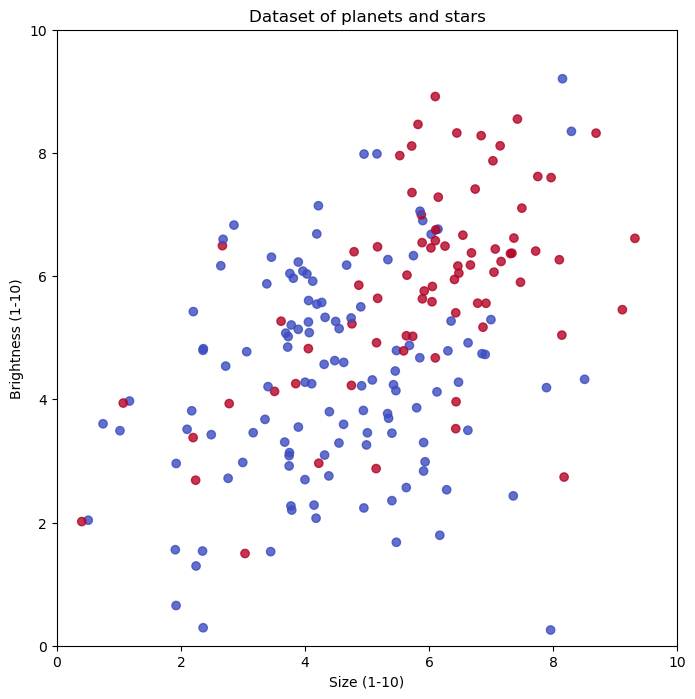

In [3]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(points[:, 0], points[:, 1], c=labels, cmap="coolwarm", alpha=0.8)
plt.xlabel("Size (1-10)")
plt.ylabel("Brightness (1-10)")
plt.title("Dataset of planets and stars")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

### Split the dataset into training and validation sets

This cell splits the dataset into training and validation sets, with 50% of the data used for training and 50% for validation.

In [4]:
train_points, test_points, train_labels, test_labels = train_test_split(
    points, labels, test_size=0.5, random_state=42
)

### Train a Decision Tree classifier

This cell creates a decision tree classifier and trains it on the training data.

In [5]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(train_points, train_labels)

DecisionTreeClassifier()

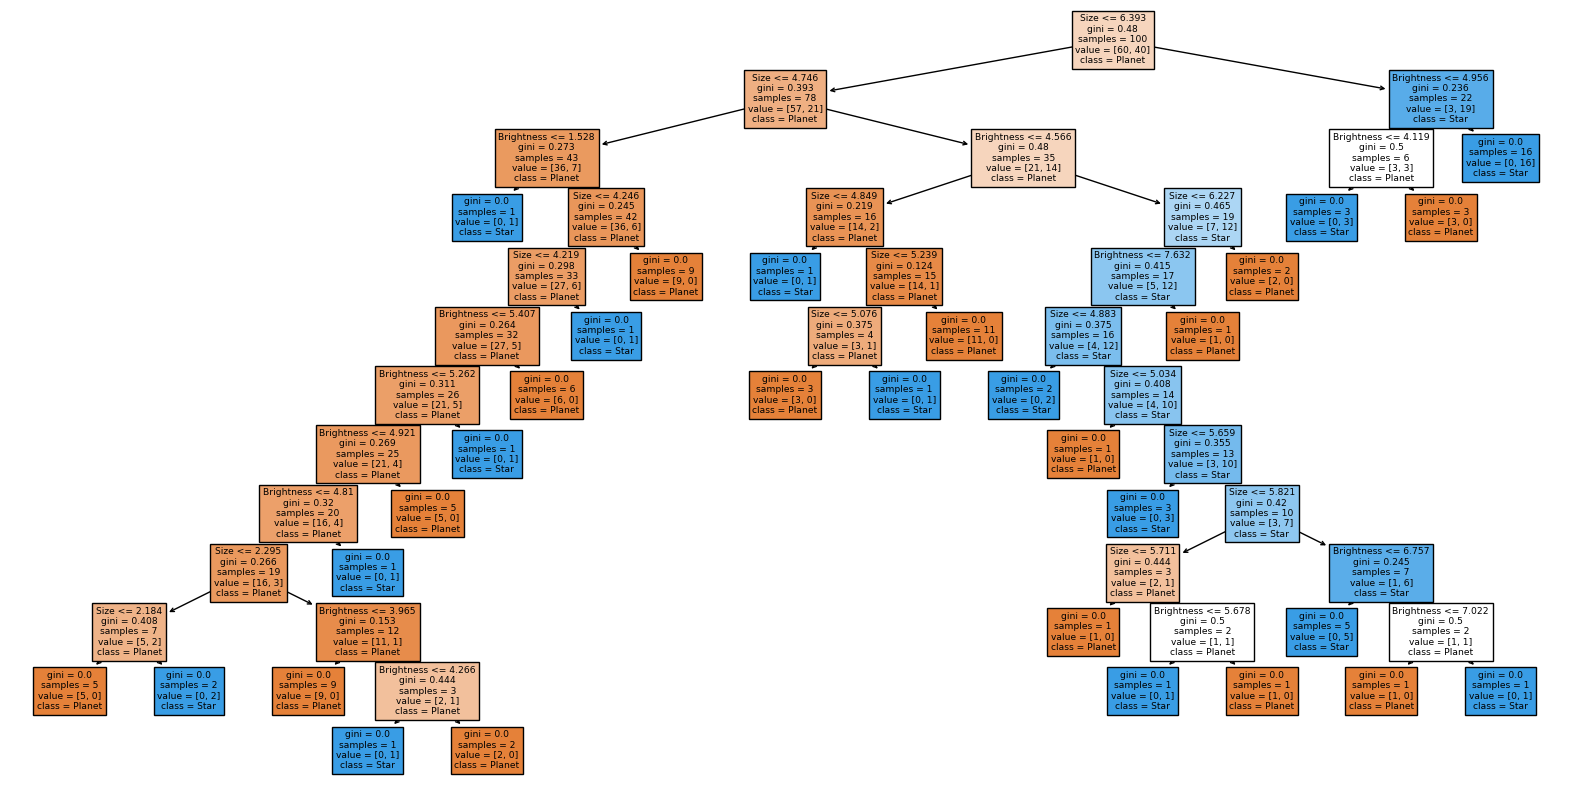

In [6]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=["Size", "Brightness"], class_names=["Planet", "Star"])
plt.show()

### Perform grid search with cross-validation to find the best hyperparameters

This cell performs a grid search with cross-validation to find the best hyperparameters for the decision tree classifier. The parameter grid includes different values for the maximum depth of the tree.

In [7]:
# Define the parameter grid for GridSearchCV
mycandidates = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=mycandidates, cv=5)
grid_search.fit(train_points, train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In this cell, we choose which estimator we use. We can use the simple decision tree or the one found using grid search.

In [16]:
# Get the best estimator (decision tree classifier)
estimator = grid_search.best_estimator_
#estimator = clf

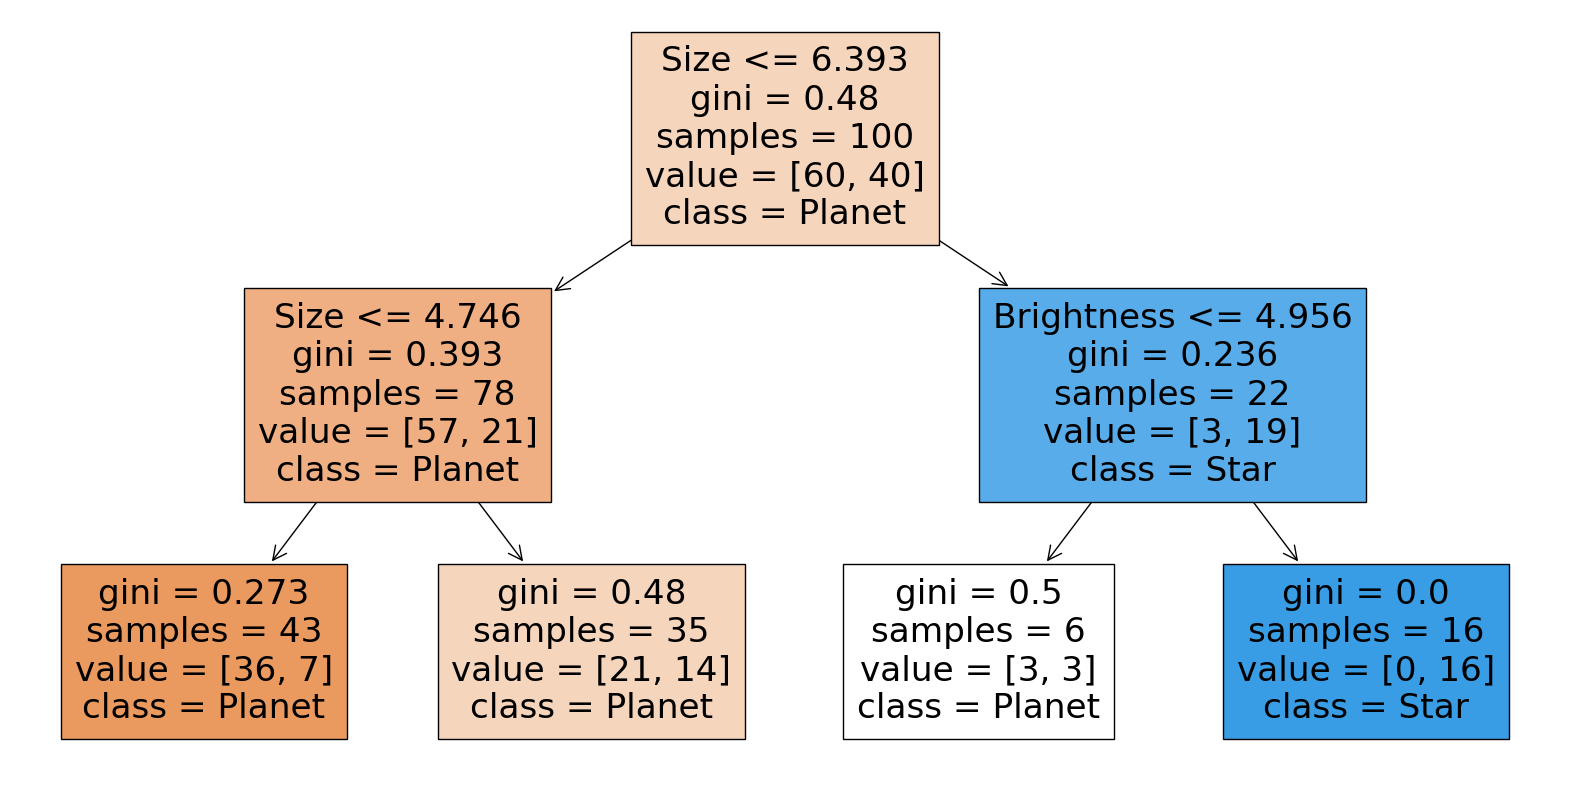

In [17]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=["Size", "Brightness"], class_names=["Planet", "Star"])
plt.show()

### Evaluate the classifier on the validation set

This cell evaluates the best decision tree classifier on the validation set and prints the accuracy and the height of the tree.

In [18]:
# Evaluate the best classifier on the validation set
accuracy = estimator.score(test_points, test_labels)
print("Validation Accuracy:", accuracy)
print("Best Tree Height:", estimator.get_depth())

Validation Accuracy: 0.77
Best Tree Height: 2


### Plot the decision boundary with the dataset

This cell defines a function to plot the decision boundary of the decision tree classifier along with the dataset. It uses a meshgrid to predict the labels for each point in the grid and then plots the decision boundary. The plot includes a legend to distinguish between planets and stars.

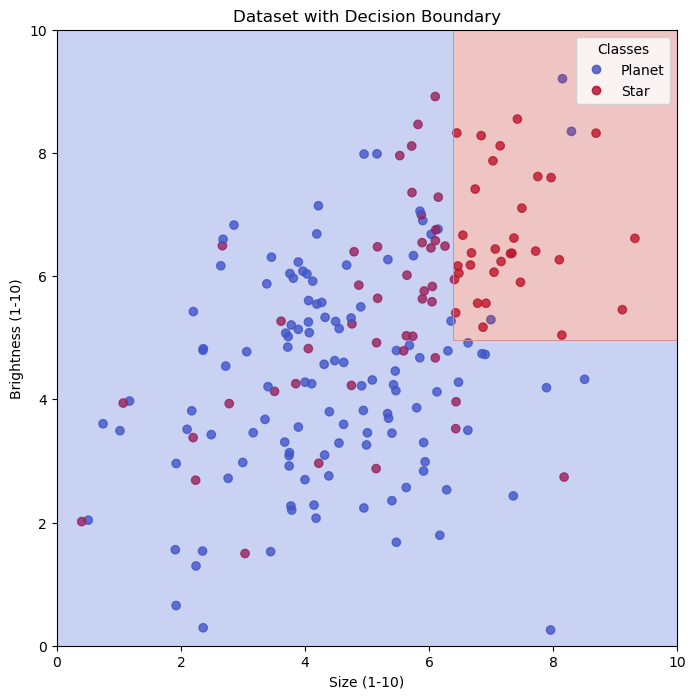

In [19]:
def plot_model_boundary(tree, points, labels):
    # Plot the dataset
    plt.figure(figsize=(8, 8))
    scatter = plt.scatter(points[:, 0], points[:, 1], c=labels, cmap="coolwarm", alpha=0.8)
    plt.xlabel("Size (1-10)")
    plt.ylabel("Brightness (1-10)")
    plt.title("Dataset with Decision Boundary")
    plt.xlim([0, 10])
    plt.ylim([0, 10])

    # Create a custom legend
    handles, _ = scatter.legend_elements()
    legend_labels = ['Planet', 'Star']
    plt.legend(handles, legend_labels, title="Classes")

    # Create a meshgrid to plot the decision boundary
    h = 0.01
    x_min, x_max = -0.1, 10.1
    y_min, y_max = -0.1, 10.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the labels for each point in the meshgrid
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
    plt.show()

# Plot the decision boundary
plot_model_boundary(estimator, points, labels)